In [1]:
import numpy as np
import pandas as pd
from astropy.io import ascii
import os
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%run -i /Users/marie/Documents/Research/dataproc/tools/cluster_tools.py

In [4]:
data = pd.read_csv('Catalogues/NGC1027_population2_lost.csv')
data

,RA_ICRS,DE_ICRS,Source,Plx,e_Plx,PM,pmRA,pmDE,Solved,nueff,...,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
0,41.773826,60.540374,464776037646911104,0.8545,0.1063,2.811,-1.799,2.160,31,1.362,...,0.988,17.921892,18.853360,16.956484,1.896875,NaN,41.953426,41.773842,60.540364,0.882463
1,41.611977,60.973933,464850499494348160,0.9201,0.0283,2.533,-1.594,1.968,31,1.427,...,0.995,15.476273,16.141022,14.678472,1.462549,NaN,42.382331,41.611992,60.973924,0.953797
2,41.387135,61.069233,464853660598221568,0.8285,0.0914,2.552,-1.825,1.784,31,1.386,...,1.369,17.162060,17.907494,16.247490,1.660004,NaN,42.513499,41.387151,61.069225,0.859669
3,42.251070,61.276006,464941655887679104,0.8647,0.0477,2.355,-1.681,1.650,31,1.428,...,1.070,16.552422,17.206670,15.765858,1.440813,NaN,42.535251,42.251086,61.275999,0.893889
4,42.129509,61.202537,464952681062317696,0.8452,0.0953,2.652,-1.683,2.050,31,1.381,...,0.990,17.742489,18.591160,16.850595,1.740564,NaN,42.491296,42.129525,61.202528,0.874296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,40.799686,62.532005,466023644050466560,0.9817,0.0642,2.630,-1.725,1.986,31,1.393,...,0.998,17.081020,17.874979,16.217472,1.657507,NaN,43.960869,40.799703,62.531996,1.012394
74,39.226658,62.617307,466071434144149120,0.9070,0.0485,2.808,-1.993,1.979,31,1.414,...,0.970,16.447214,17.155657,15.630446,1.525211,NaN,44.345737,39.226677,62.617298,0.936223
75,42.672829,62.162159,467252240914244480,0.9654,0.0409,2.769,-1.700,2.186,31,1.426,...,1.007,16.238014,16.906803,15.442007,1.464796,NaN,43.267141,42.672845,62.162149,0.994258
76,41.114886,62.905429,467535884855567872,0.9308,0.0180,2.818,-1.936,2.048,31,1.433,...,0.945,8.369972,9.017055,7.584709,1.432346,-43.63,44.239616,41.114905,62.905420,0.959092


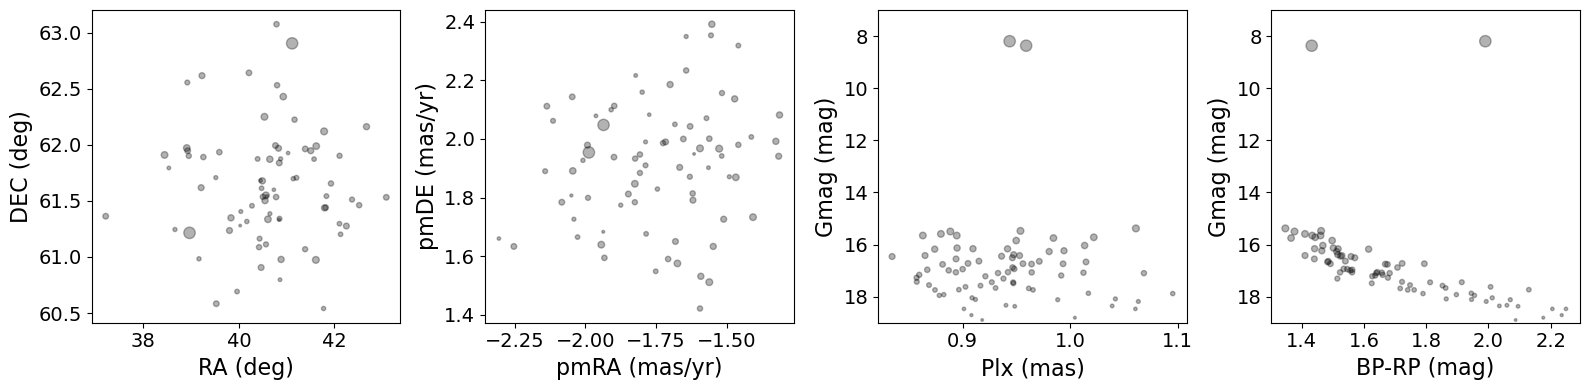

In [6]:
fig,ax = plt.subplots(1,4, figsize=(16,4),tight_layout=True)
pop = data
ax[0].scatter(pop.RAJ2000, pop.DEJ2000, color='k', s=(19.5-pop.Gmag)*6, alpha=0.3)
ax[0].set_xlabel("RA (deg)",fontsize=16)
ax[0].set_ylabel("DEC (deg)",fontsize=16)
ax[1].scatter(pop.pmRA, pop.pmDE, color='k', s=(19.5-pop.Gmag)*6, alpha=0.3)
ax[1].set_xlabel("pmRA (mas/yr)",fontsize=16)
ax[1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[2].scatter(pop.Plx_corr, pop.Gmag, color='k', s=(19.5-pop.Gmag)*6, alpha=0.3)
ax[2].set_ylim(19,7)
ax[2].set_xlabel("Plx (mas)",fontsize=16)
ax[2].set_ylabel("Gmag (mag)",fontsize=16)
ax[3].scatter(pop["BP-RP"], pop.Gmag, color='k', s=(19.5-pop.Gmag)*6, alpha=0.3)
ax[3].set_ylim(19,7)
ax[3].set_xlabel("BP-RP (mag)",fontsize=16)
ax[3].set_ylabel("Gmag (mag)",fontsize=16)

ax[0].tick_params(labelsize=14)
ax[1].tick_params(labelsize=14)
ax[2].tick_params(labelsize=14)
ax[3].tick_params(labelsize=14)


In [7]:
data2 = data[((data.Gmag > 10))]

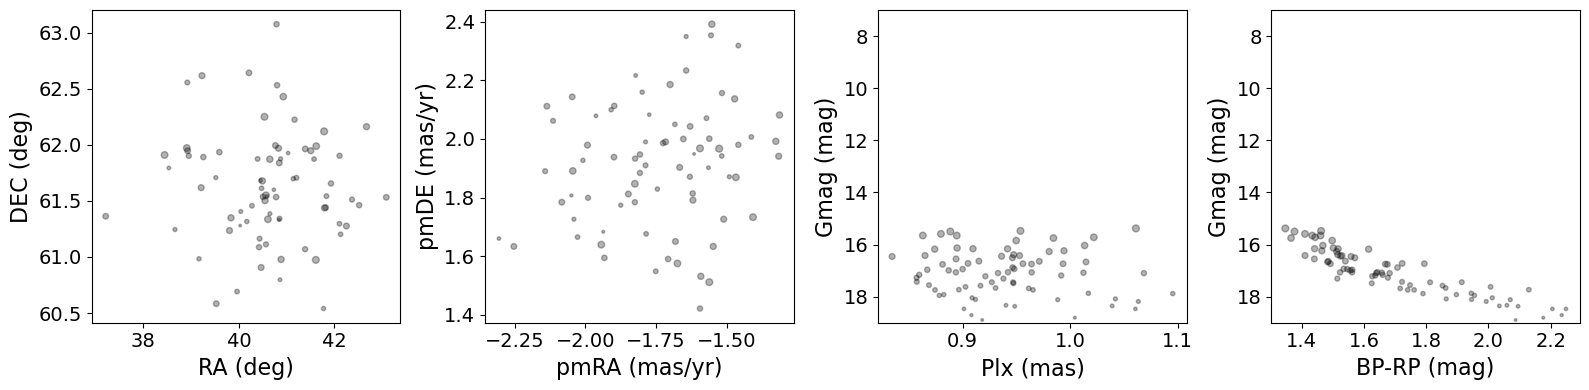

In [8]:
fig,ax = plt.subplots(1,4, figsize=(16,4),tight_layout=True)
pop = data2
ax[0].scatter(pop.RAJ2000, pop.DEJ2000, color='k', s=(19.5-pop.Gmag)*6, alpha=0.3)
ax[0].set_xlabel("RA (deg)",fontsize=16)
ax[0].set_ylabel("DEC (deg)",fontsize=16)
ax[1].scatter(pop.pmRA, pop.pmDE, color='k', s=(19.5-pop.Gmag)*6, alpha=0.3)
ax[1].set_xlabel("pmRA (mas/yr)",fontsize=16)
ax[1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[2].scatter(pop.Plx_corr, pop.Gmag, color='k', s=(19.5-pop.Gmag)*6, alpha=0.3)
ax[2].set_ylim(19,7)
ax[2].set_xlabel("Plx (mas)",fontsize=16)
ax[2].set_ylabel("Gmag (mag)",fontsize=16)
ax[3].scatter(pop["BP-RP"], pop.Gmag, color='k', s=(19.5-pop.Gmag)*6, alpha=0.3)
ax[3].set_ylim(19,7)
ax[3].set_xlabel("BP-RP (mag)",fontsize=16)
ax[3].set_ylabel("Gmag (mag)",fontsize=16)

ax[0].tick_params(labelsize=14)
ax[1].tick_params(labelsize=14)
ax[2].tick_params(labelsize=14)
ax[3].tick_params(labelsize=14)
